In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('dataset/cleaned_combined_generation_dataset.csv')
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,electricity_demand,dwpt,wspd,wdir,prcp,rhum,pres,season,month,population
0,2000-01-01 00:00:00,5,0,1,17.483571,0,512.319382,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569190e+07
1,2000-01-01 01:00:00,5,1,1,14.308678,0,439.055673,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569198e+07
2,2000-01-01 02:00:00,5,2,1,18.238443,0,539.090652,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569206e+07
3,2000-01-01 03:00:00,5,3,1,22.615149,0,523.248968,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569215e+07
4,2000-01-01 04:00:00,5,4,1,13.829233,0,516.822822,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569223e+07


In [3]:
dataset.isna().sum()

timestamp             0
day_of_week           0
hour_of_day           0
is_weekend            0
temperature           0
is_holiday            0
electricity_demand    0
dwpt                  0
wspd                  0
wdir                  0
prcp                  0
rhum                  0
pres                  0
season                0
month                 0
population            0
dtype: int64

In [4]:
earlier_dataset=pd.read_csv('dataset/24-hours Delhi Power Consumption dataset.csv')
earlier_dataset['timestamp'] = pd.to_datetime(earlier_dataset['timestamp'])
earlier_dataset.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [5]:
# Merge the earlier_dataset into dataset on the 'timestamp' column
combined_dataset = pd.merge(dataset, earlier_dataset[['timestamp', 'solar_generation', 'load']], on='timestamp', how='left')

# Display the first few rows of the combined dataset
combined_dataset.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,electricity_demand,dwpt,wspd,wdir,prcp,rhum,pres,season,month,population,solar_generation,load
0,2000-01-01 00:00:00,5,0,1,17.483571,0,512.319382,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569190e+07,NaN,NaN
1,2000-01-01 01:00:00,5,1,1,14.308678,0,439.055673,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569198e+07,NaN,NaN
2,2000-01-01 02:00:00,5,2,1,18.238443,0,539.090652,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569206e+07,NaN,NaN
3,2000-01-01 03:00:00,5,3,1,22.615149,0,523.248968,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569215e+07,NaN,NaN
4,2000-01-01 04:00:00,5,4,1,13.829233,0,516.822822,16.036364,51.8,20.0,0.0,50.045455,1010.0,1,1,1.569223e+07,NaN,NaN


In [6]:
combined_dataset.isna().sum()

timestamp                  0
day_of_week                0
hour_of_day                0
is_weekend                 0
temperature                0
is_holiday                 0
electricity_demand         0
dwpt                       0
wspd                       0
wdir                       0
prcp                       0
rhum                       0
pres                       0
season                     0
month                      0
population                 0
solar_generation      201624
load                  201624
dtype: int64

In [7]:
combined_dataset_2023 = combined_dataset[combined_dataset['timestamp'].dt.year == 2023]
combined_dataset_2023.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,electricity_demand,dwpt,wspd,wdir,prcp,rhum,pres,season,month,population,solar_generation,load
201624,2023-01-01 00:00:00,6,0,1,14.228017,0,515.398478,9.033333,3.6,180.000000,0.0,96.666667,1019.566667,1,1,3.294130e+07,7.819507,18493.0
201625,2023-01-01 01:00:00,6,1,1,14.656401,0,517.625514,9.000000,5.4,280.000000,0.0,98.666667,1019.900000,1,1,3.294140e+07,0.886376,17090.0
201626,2023-01-01 02:00:00,6,2,1,6.770540,0,528.393318,9.000000,4.8,273.333333,0.0,98.666667,1020.233333,1,1,3.294150e+07,0.798470,16052.0
201627,2023-01-01 03:00:00,6,3,1,11.474267,0,498.441437,8.800000,3.0,183.333333,0.0,96.666667,1020.700000,1,1,3.294160e+07,3.067700,15356.0
201628,2023-01-01 04:00:00,6,4,1,9.821519,0,534.359860,9.133333,3.0,166.666667,0.0,90.666667,1021.366667,1,1,3.294170e+07,0.359479,14936.0


In [8]:
combined_dataset_2023.dtypes

timestamp             datetime64[ns]
day_of_week                    int64
hour_of_day                    int64
is_weekend                     int64
temperature                  float64
is_holiday                     int64
electricity_demand           float64
dwpt                         float64
wspd                         float64
wdir                         float64
prcp                         float64
rhum                         float64
pres                         float64
season                         int64
month                          int64
population                   float64
solar_generation             float64
load                         float64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

combined_dataset_2023.drop(columns=['timestamp','electricity_demand'], inplace=True)

# Split the dataset
train_data, test_data = train_test_split(combined_dataset_2023, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)


C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\2481610845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset_2023.drop(columns=['timestamp','electricity_demand'], inplace=True)


In [10]:
# CNN Features
cnn_features = ["temperature", "dwpt", "wspd", "wdir", "prcp", "rhum", "pres"]
X_train_cnn = train_data[cnn_features]
X_val_cnn = val_data[cnn_features]
X_test_cnn = test_data[cnn_features]

# LSTM Features
lstm_features = ["day_of_week", "hour_of_day", "season", "month"]
X_train_lstm = train_data[lstm_features]
X_val_lstm = val_data[lstm_features]
X_test_lstm = test_data[lstm_features]

# ANN Features
ann_features = ["is_holiday", "is_weekend", "population","solar_generation"]
X_train_ann = train_data[ann_features]
X_val_ann = val_data[ann_features]
X_test_ann = test_data[ann_features]

# Target Variable
y_train = train_data["load"]
y_val = val_data["load"]
y_test = test_data["load"]

# Reshape data for CNN and LSTM
X_train_cnn = np.array(X_train_cnn).reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_val_cnn = np.array(X_val_cnn).reshape((X_val_cnn.shape[0], X_val_cnn.shape[1], 1))
X_test_cnn = np.array(X_test_cnn).reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

X_train_lstm = np.array(X_train_lstm).reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_val_lstm = np.array(X_val_lstm).reshape((X_val_lstm.shape[0], X_val_lstm.shape[1], 1))
X_test_lstm = np.array(X_test_lstm).reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Input

# CNN Model
cnn_input = Input(shape=(len(cnn_features), 1))
cnn_layer = Conv1D(filters=64, kernel_size=2, activation='relu')(cnn_input)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)
cnn_output = Dense(64, activation='relu')(cnn_layer)



In [12]:
# LSTM Model
lstm_input = Input(shape=(len(lstm_features), 1))
lstm_layer = LSTM(50, activation='relu')(lstm_input)


In [13]:
from tensorflow.keras.layers import concatenate

# Combine CNN output with LSTM features
combined_input = concatenate([cnn_output, lstm_layer])

# ANN Model
ann_input = Input(shape=(len(ann_features),))
combined_input = concatenate([combined_input, ann_input])
ann_layer = Dense(50, activation='relu')(combined_input)
ann_output = Dense(1, activation='linear')(ann_layer)


In [14]:
from tensorflow.keras.models import Model

# Combined Model
model = Model(inputs=[cnn_input, lstm_input, ann_input], outputs=ann_output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [15]:
history=model.fit([X_train_cnn, X_train_lstm, X_train_ann], y_train, validation_data=([X_val_cnn, X_val_lstm, X_val_ann], y_val), epochs=25, batch_size=32, verbose=1)

Epoch 1/25
175/175 [==============================] - 12s 23ms/step - loss: 10818301952.0000 - mae: 42260.7695 - val_loss: 12301542.0000 - val_mae: 2722.8936
Epoch 2/25
175/175 [==============================] - 2s 13ms/step - loss: 11990415.0000 - mae: 2668.3103 - val_loss: 13795855.0000 - val_mae: 2782.4468
Epoch 3/25
175/175 [==============================] - 2s 14ms/step - loss: 12361217.0000 - mae: 2717.1155 - val_loss: 12362925.0000 - val_mae: 2745.3716
Epoch 4/25
175/175 [==============================] - 2s 14ms/step - loss: 10206883.0000 - mae: 2455.2395 - val_loss: 8657383.0000 - val_mae: 2391.9756
Epoch 5/25
175/175 [==============================] - 2s 13ms/step - loss: 7953834.0000 - mae: 2174.4905 - val_loss: 8168469.0000 - val_mae: 2300.0544
Epoch 6/25
175/175 [==============================] - 2s 14ms/step - loss: 7699894.0000 - mae: 2133.1052 - val_loss: 7038563.5000 - val_mae: 2004.6041
Epoch 7/25
175/175 [==============================] - 2s 13ms/step - loss: 8799201

In [16]:
# Evaluate the combined model
loss, mae = model.evaluate([X_test_cnn, X_test_lstm, X_test_ann], y_test)
print(f'Model Mean Absolute Error: {mae:.2f}')

55/55 [==============================] - 0s 7ms/step - loss: 24346170.0000 - mae: 4466.8833
Model Mean Absolute Error: 4466.88


In [21]:
combined_dataset_cls = pd.merge(
    dataset,
    earlier_dataset[["timestamp", "solar_generation", "load", "compensation_method"]],
    on="timestamp",
    how="left",
)

combined_dataset_cls_2023 = combined_dataset_cls[
    combined_dataset_cls["timestamp"].dt.year == 2023
]

combined_dataset_cls_2023.drop(
    columns=["timestamp", "electricity_demand"], inplace=True
)

C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\1576171881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset_cls_2023.drop(


In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
combined_dataset_cls_2023['compensation_method']=le.fit_transform(combined_dataset_cls_2023['compensation_method'])

sc=StandardScaler()
combined_dataset_cls_2023.iloc[:, :-1] = sc.fit_transform(combined_dataset_cls_2023.iloc[:, :-1])

# Split the dataset
train_data_cls, test_data_cls = train_test_split(
    combined_dataset_cls_2023, test_size=0.2, random_state=42
)
train_data_cls, val_data_cls = train_test_split(
    train_data_cls, test_size=0.2, random_state=42
)

C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\482045807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset_cls_2023['compensation_method']=le.fit_transform(combined_dataset_cls_2023['compensation_method'])
C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\482045807.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.49972106 1.49972106 1.49972106 ... 0.99975682 0.99975682 1.49972106]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_dataset_cls_2023.iloc[:, :-1] = sc.fit_transform(combined_dataset_cls_2023.iloc[:, :-1])
C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\482045807.py:7: FutureWarning: Set

In [27]:
combined_dataset_cls_2023.head()

,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,dwpt,wspd,wdir,prcp,rhum,pres,season,month,population,solar_generation,load,compensation_method
201624,1.499721,-1.660967,1.580822,-1.480249,-0.091155,-1.073456,-0.777487,0.128932,-0.191556,1.467856,1.429179,-1.354799,-1.601789,-1.731853,-0.892740,0.132659,3
201625,1.499721,-1.516519,1.580822,-1.427774,-0.091155,-1.078356,-0.392261,1.098175,-0.191556,1.557059,1.478852,-1.354799,-1.601789,-1.731456,-0.962502,-0.281761,3
201626,1.499721,-1.372070,1.580822,-2.393747,-0.091155,-1.078356,-0.520670,1.033559,-0.191556,1.557059,1.528525,-1.354799,-1.601789,-1.731060,-0.963387,-0.588366,3
201627,1.499721,-1.227622,1.580822,-1.817567,-0.091155,-1.107756,-0.905895,0.161240,-0.191556,1.467856,1.598068,-1.354799,-1.601789,-1.730663,-0.940553,-0.793951,3
201628,1.499721,-1.083173,1.580822,-2.020019,-0.091155,-1.058756,-0.905895,-0.000300,-0.191556,1.200246,1.697415,-1.354799,-1.601789,-1.730267,-0.967804,-0.918011,3


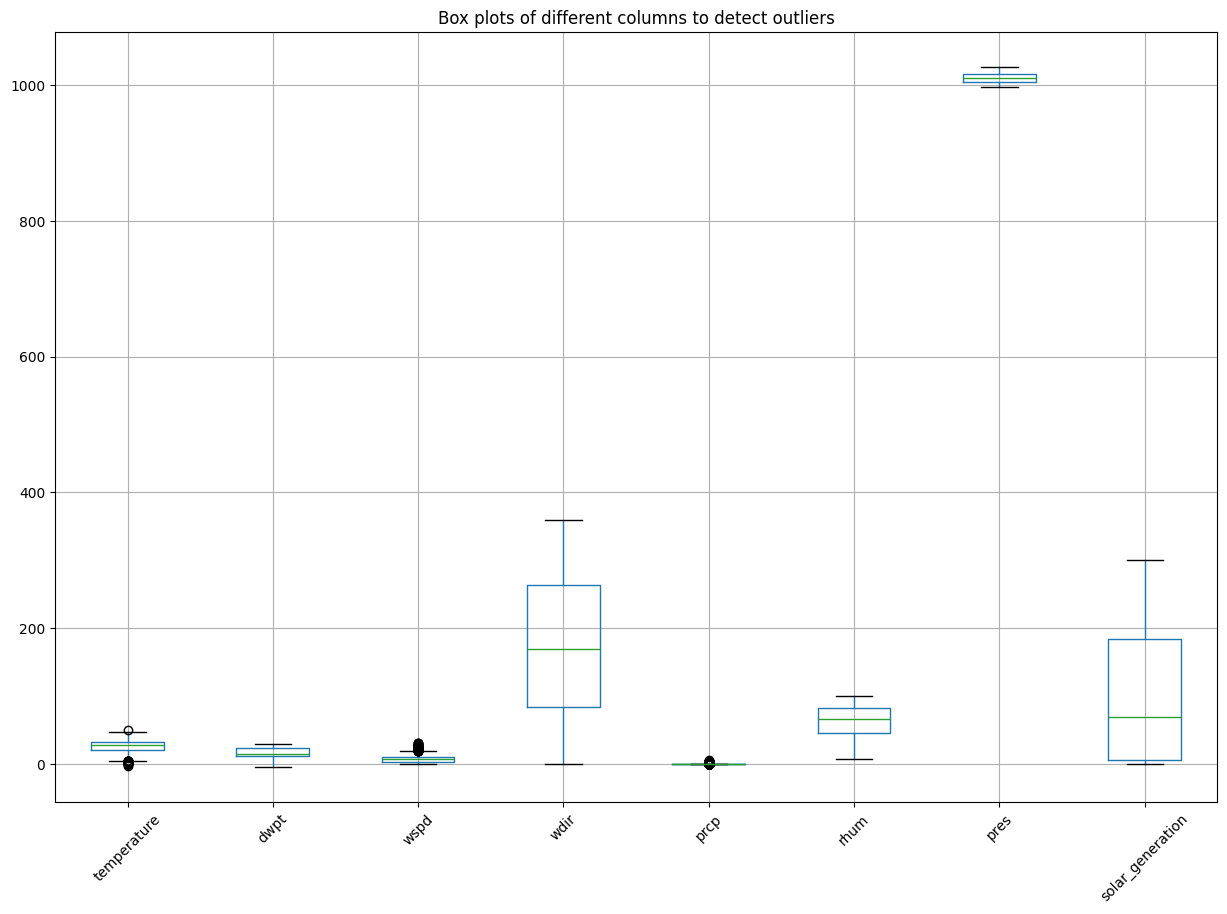

In [29]:
# Select columns to plot
columns_to_plot = ['temperature', 'dwpt', 'wspd', 'wdir', 'prcp', 'rhum', 'pres', 'solar_generation']

# Draw box plots
combined_dataset_2023[columns_to_plot].boxplot(figsize=(15, 10))
plt.xticks(rotation=45)
plt.title('Box plots of different columns to detect outliers')
plt.show()

In [17]:
# Classification of compensation method

# Scale and label encode


# Target Variable
y_train_cls = train_data_cls["compensation_method"]
y_val_cls = val_data_cls["compensation_method"]
y_test_cls = test_data_cls["compensation_method"]

# # Scale the features
# scaler_cls = StandardScaler()
# train_data_scaled_cls = scaler_cls.fit_transform(
#     train_data_cls.drop(columns=["compensation_method"])
# )
# val_data_scaled_cls = scaler_cls.transform(
#     val_data_cls.drop(columns=["compensation_method"])
# )
# test_data_scaled_cls = scaler_cls.transform(
#     test_data_cls.drop(columns=["compensation_method"])
# )

# CNN Features
cnn_features_cls = ["temperature", "dwpt", "wspd", "wdir", "prcp", "rhum", "pres"]
X_train_cnn_cls = train_data_cls[cnn_features_cls]
X_val_cnn_cls = val_data_cls[cnn_features_cls]
X_test_cnn_cls = test_data_cls[cnn_features_cls]

# LSTM Features
lstm_features_cls = ["day_of_week", "hour_of_day", "season", "month"]
X_train_lstm_cls = train_data_cls[lstm_features_cls]
X_val_lstm_cls = val_data_cls[lstm_features_cls]
X_test_lstm_cls = test_data_cls[lstm_features_cls]

# ANN Features
ann_features_cls = ["is_holiday", "is_weekend", "solar_generation"]
X_train_ann_cls = train_data_cls[ann_features_cls]
X_val_ann_cls = val_data_cls[ann_features_cls]
X_test_ann_cls = test_data_cls[ann_features_cls]

# Reshape data for CNN and LSTM
X_train_cnn_cls = np.array(X_train_cnn_cls).reshape(
    (X_train_cnn_cls.shape[0], X_train_cnn_cls.shape[1], 1)
)
X_val_cnn_cls = np.array(X_val_cnn_cls).reshape(
    (X_val_cnn_cls.shape[0], X_val_cnn_cls.shape[1], 1)
)
X_test_cnn_cls = np.array(X_test_cnn_cls).reshape(
    (X_test_cnn_cls.shape[0], X_test_cnn_cls.shape[1], 1)
)

X_train_lstm_cls = np.array(X_train_lstm_cls).reshape(
    (X_train_lstm_cls.shape[0], X_train_lstm_cls.shape[1], 1)
)
X_val_lstm_cls = np.array(X_val_lstm_cls).reshape(
    (X_val_lstm_cls.shape[0], X_val_lstm_cls.shape[1], 1)
)
X_test_lstm_cls = np.array(X_test_lstm_cls).reshape(
    (X_test_lstm_cls.shape[0], X_test_lstm_cls.shape[1], 1)
)

C:\Users\ariel\AppData\Local\Temp\ipykernel_20308\1447010069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset_cls_2023.drop(columns=['timestamp', 'electricity_demand'], inplace=True)


In [18]:
#building cnn model
cnn_input_cls = Input(shape=(len(cnn_features_cls), 1))
cnn_layer_cls = Conv1D(filters=64, kernel_size=2, activation='relu')(cnn_input_cls)
cnn_layer_cls = MaxPooling1D(pool_size=2)(cnn_layer_cls)
cnn_layer_cls = Flatten()(cnn_layer_cls)
cnn_output_cls = Dense(64, activation='relu')(cnn_layer_cls)

#building lstm model
lstm_input_cls = Input(shape=(len(lstm_features_cls), 1))
lstm_layer_cls = LSTM(50, activation='relu')(lstm_input_cls)

# Combine CNN output with LSTM features
combined_input_cls = concatenate([cnn_output_cls, lstm_layer_cls])

# ANN Model
ann_input_cls = Input(shape=(len(ann_features_cls),))
combined_input_cls = concatenate([combined_input_cls, ann_input_cls])
ann_layer_cls = Dense(50, activation='relu')(combined_input_cls)
ann_output_cls = Dense(5, activation='softmax')(ann_layer_cls)

# Combined Model
model_cls = Model(inputs=[cnn_input_cls, lstm_input_cls, ann_input_cls], outputs=ann_output_cls)
model_cls.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [19]:
history_cls=model_cls.fit([X_train_cnn_cls, X_train_lstm_cls, X_train_ann_cls], y_train_cls, validation_data=([X_val_cnn_cls, X_val_lstm_cls, X_val_ann_cls], y_val_cls), epochs=25, batch_size=32, verbose=1)


Epoch 1/25
175/175 [==============================] - 3s 14ms/step - loss: 1098565.7500 - accuracy: 0.3157 - val_loss: 77984.3047 - val_accuracy: 0.5079
Epoch 2/25
175/175 [==============================] - 2s 13ms/step - loss: 40682.3359 - accuracy: 0.3407 - val_loss: 53975.5312 - val_accuracy: 0.2082
Epoch 3/25
175/175 [==============================] - 2s 13ms/step - loss: 38144.3516 - accuracy: 0.3490 - val_loss: 40081.7773 - val_accuracy: 0.5079
Epoch 4/25
175/175 [==============================] - 2s 14ms/step - loss: 33133.0312 - accuracy: 0.3676 - val_loss: 37004.4688 - val_accuracy: 0.5079
Epoch 5/25
175/175 [==============================] - 3s 16ms/step - loss: 26855.0566 - accuracy: 0.4207 - val_loss: 21168.0566 - val_accuracy: 0.6252
Epoch 6/25
175/175 [==============================] - 2s 14ms/step - loss: 19844.4316 - accuracy: 0.4477 - val_loss: 10288.0547 - val_accuracy: 0.2396
Epoch 7/25
175/175 [==============================] - 2s 14ms/step - loss: 17634.1172 - accu

In [20]:
# Evaluate the combined model
loss, accuracy = model_cls.evaluate([X_test_cnn_cls, X_test_lstm_cls, X_test_ann_cls], y_test_cls)
print(f'Model Accuracy: {accuracy:.2f}')

55/55 [==============================] - 0s 5ms/step - loss: 24440.4922 - accuracy: 0.2311
Model Accuracy: 0.23
